In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot

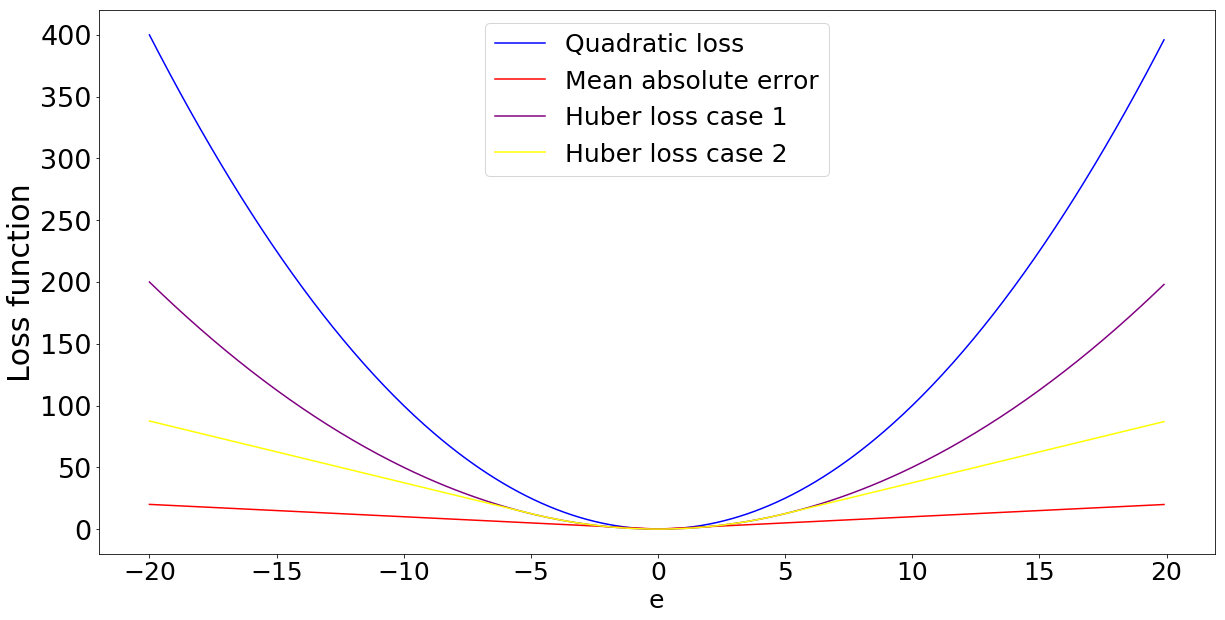

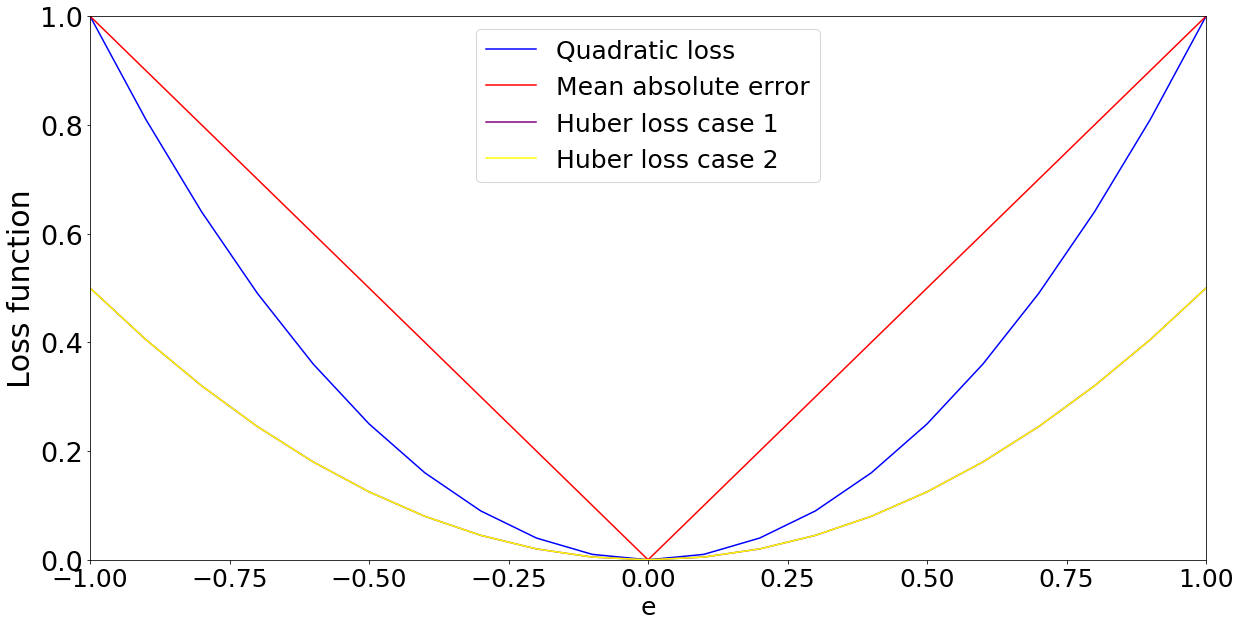

In [71]:
#Question 4a
e=[]
L_a=[]
L_b=[]
L_c1=[]
L_c2=[]
delta1=50
delta2=5

for i in range(-200,200):
    e.append(i/10)
    a=e[-1]**2
    b=abs(e[-1])
    if abs(e[-1]) <= delta1:
        c1=0.5*(e[-1]**2)
    else:
        c1=delta1*abs(e[-1])-.5*(delta1**2)
    if abs(e[-1]) <= delta2:
        c2=0.5*(e[-1]**2)
    else:
        c2=delta2*abs(e[-1])-.5*(delta2**2)
    L_a.append(a)
    L_b.append(b)
    L_c1.append(c1)
    L_c2.append(c2)

fig=plt.figure(figsize=(20,10))
plt.plot(e,L_a, color='blue')
plt.plot(e,L_b, color='red')
plt.plot(e,L_c1, color='purple')
plt.plot(e,L_c2, color='yellow')
plt.legend(["Quadratic loss", "Mean absolute error", "Huber loss case 1", "Huber loss case 2"],fontsize=25)
plt.ylabel('Loss function', fontsize = 30)
plt.xlabel('e', fontsize=25)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

fig=plt.figure(figsize=(20,10))
plt.plot(e,L_a, color='blue')
plt.plot(e,L_b, color='red')
plt.plot(e,L_c1, color='purple')
plt.plot(e,L_c2, color='yellow')
plt.legend(["Quadratic loss", "Mean absolute error", "Huber loss case 1", "Huber loss case 2"],fontsize=25)
plt.ylabel('Loss function', fontsize = 30)
plt.xlabel('e', fontsize=25)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.xlim([-1,1])
plt.ylim([0,1])
plt.show()

We can see from the two graphs above that the curve for quadratic loss function has the largest gradient for large e, while the curve for mean absolute error has the smallest gradient for large e. Quadratic loss is effective for large e because it is highly sensitive in this region. For small e (i.e. |e| < 1), mean absolute error is more sensitive. Huber loss is sort of a "happy medium" between the two.

In [194]:
#question 4b
def gradient_descent(x, y, initial_theta, loss_func, alpha=0.01, precision=0.001):
    loss = []
    theta = initial_theta
    all_thetas1 = [] # to store all thetas
    predictions = [] # to store all predictions
    number_of_steps = 0 
    previous_loss = 0
    prediction = np.dot(x,theta) #dot product
    error = prediction - y
    current_loss = loss_func(error)
    predictions.append(prediction)
    loss.append(current_loss)
    all_thetas1.append(theta)
    number_of_steps+=1
    while abs(current_loss - previous_loss) > precision: #if the difference between current and previous values of loss function is bigger than the precision we set
        previous_loss = current_loss #we update the value of the loss function to be the current value of loss function
        gradient = np.dot(x.T,error) #new gradient
        theta = theta - alpha * gradient  #update theta
        all_thetas1.append(theta)
        
        prediction = np.dot(x,theta)
        error = prediction - y
        current_loss = loss_func(error)
        loss.append(current_loss)
        
    return all_thetas1, loss, predictions

def loss_func_a(error): #squared loss
    return np.sum(error**2)

def loss_func_b(error): #mean absolute error
    return np.sum(abs(error))

def loss_func_c(error): #Huber loss case 1
    L = 0
    for i in range(len(error)):
        if abs(error[i]) <= 5:
            L += 0.5*(error[i]**2)
        else:
            L += 5*abs(error[i])-.5*(5**2)
    return L
    
def loss_func_d(error): #Huber loss case 2
    L = 0
    for i in range(len(error)):
        if abs(error[i]) <= .5:
            L += 0.5*(error[i]**2)
        else:
            L += .5*abs(error[i])-.5*(.5**2)
    return L        
    

In [195]:
#question 4c
def stochastic_gradient_descent(x, y, initial_theta, loss_func, alpha=0.01, precision=0.001):
    current_loss = []
    predictions = []
    all_thetas = []
    number_of_steps = 0
    previous_loss = 0
    epoch = 0
    i = 0 #index
    theta = initial_theta
    prediction = np.dot(x[i,:],theta)
    error = prediction - y[i]
    gradient = x[i,:].T*error
    current_loss.append(loss_func(error))
    number_of_steps+=1
    predictions.append(prediction)
    all_thetas.append(theta)
    
    while abs(current_loss[number_of_steps-1]-previous_loss) > precision:
        gradient = x[i,:].T*error
        theta = theta - alpha * gradient
        all_thetas.append(theta)
        i += 1
        if i == y.size:
            epoch +=1
            reorder = np.random.permutation(y.size)
            x = x[reorder]
            y = y[reorder]
            i = 0
        prediction = np.dot(x[i,:], theta)
        error = prediction - y[i]
        previous_loss = current_loss[number_of_steps-1]
        current_loss.append(loss_func(error))
        number_of_steps += 1
        
    return all_thetas, current_loss, predictions


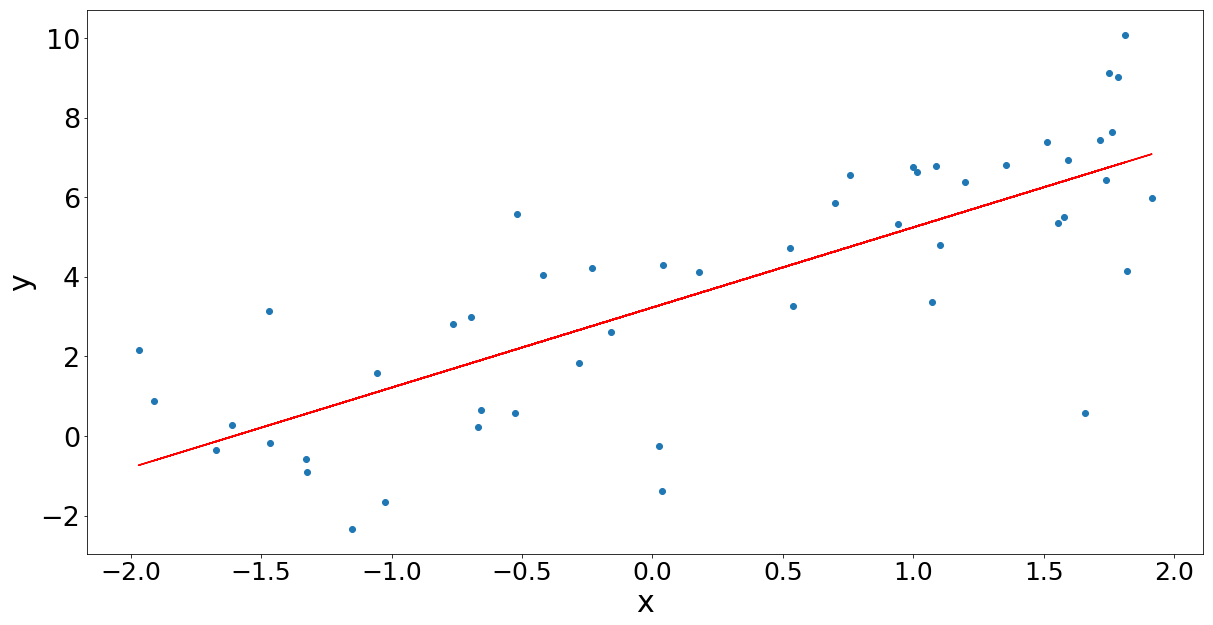

In [196]:
#question 5a i)
x=np.random.uniform(low=-2, high=2, size=(50,))
y=3+2*x+np.random.normal(0,2,50)

matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_ai= np.dot(inv(np.dot(matrix_x.T,matrix_x)),np.dot(matrix_x.T,y)) #This is the analytical solution of theta

y_analytical_solution=np.dot(matrix_x,theta_ai)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_analytical_solution,color='red')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

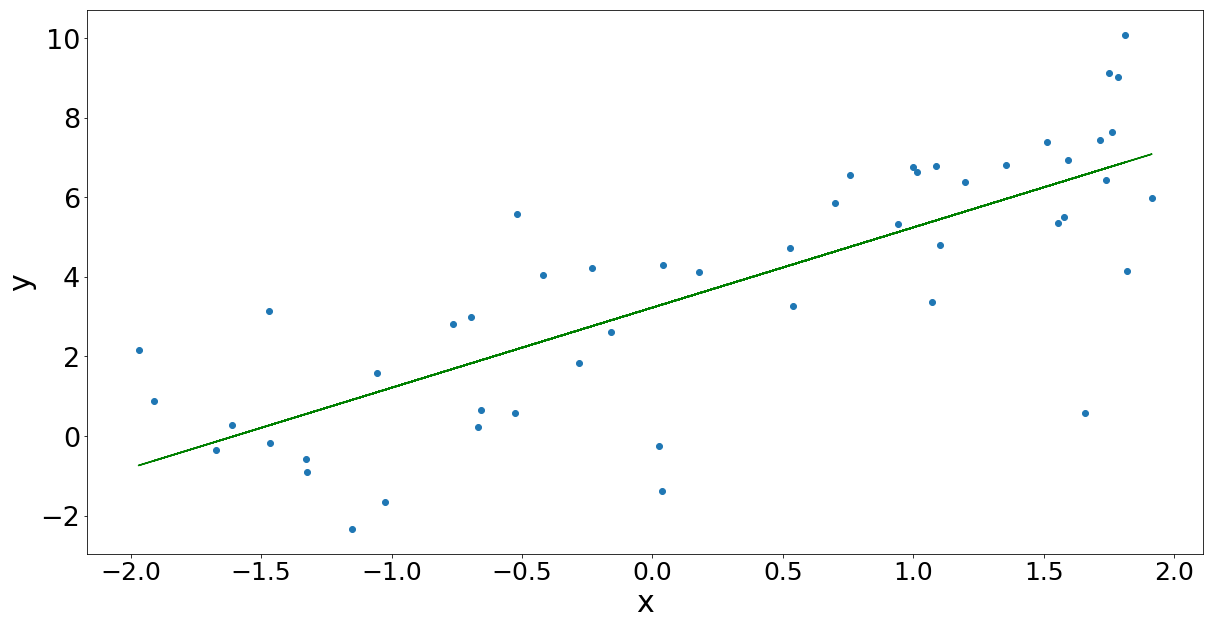

In [197]:
#question 5a) ii)
matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_i = np.random.rand(2)
all_thetas1, loss, predictions = gradient_descent(matrix_x, y, theta_i, loss_func_a)

theta_aii = all_thetas1[-1]

y_gradient_descent=np.dot(matrix_x,theta_aii)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_gradient_descent,color='green')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

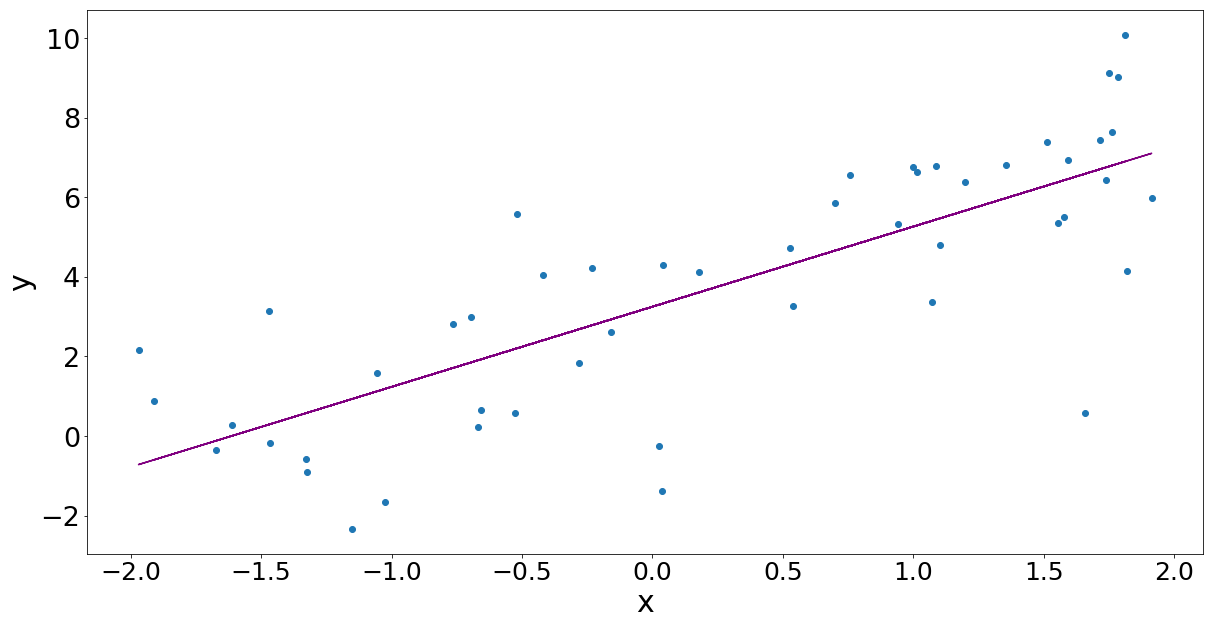

In [198]:
#question 5a) iii)
matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_i = np.random.rand(2)
all_thetas2, loss, predictions = stochastic_gradient_descent(matrix_x, y, theta_i, loss_func_a)

theta_aiii = all_thetas2[-1]

y_stochastic_gradient_descent=np.dot(matrix_x,theta_aiii)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_stochastic_gradient_descent,color='purple')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

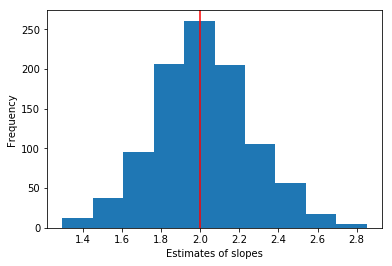

In [172]:
#question 5bi) – repeating steps in part a) 1000 times for analytical solution

theta = []
slopes_a = []
x = np.zeros((50,1000))
y = np.zeros((50,1000))
for d in range(1000):
    x[:,d] = np.random.uniform(low=-2, high=2, size=(50,))
    y[:,d] = 3+2*x[:,d]+np.random.normal(0,2,50)
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    theta.append(np.dot(inv(np.dot(matrix_x.T,matrix_x)),np.dot(matrix_x.T,y[:,d]))) #This is the analytical solution of theta
    slopes_a.append(theta[d-1][1])


plt.hist(slopes_a)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

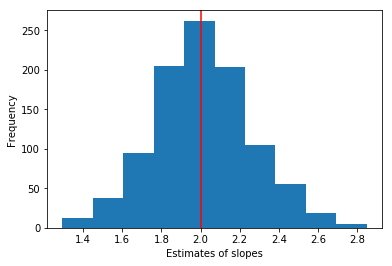

In [173]:
#question 5bii) – repeating steps in part a) 1000 times for batch gradient descent
theta_b = []
slopes_b = []
for d in range(1000):
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    theta_i = np.random.rand(2)
    all_thetas2, loss, predictions = gradient_descent(matrix_x, y[:,d], theta_i, loss_func_a)
    theta_b.append(all_thetas2[-1])
    slopes_b.append(theta_b[d-1][1])

plt.hist(slopes_b)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

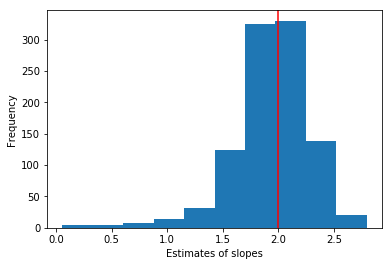

In [174]:
#question 5biii) – repeating steps in part a) 1000 times for stochastic gradient descent
theta_c = []
slopes_c = []
for d in range(1000):
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    theta_i = np.random.rand(2)
    all_thetas2, loss, predictions = stochastic_gradient_descent(matrix_x, y[:,d], theta_i, loss_func_a)
    theta_c.append(all_thetas2[-1])
    slopes_c.append(theta_c[d-1][1])

plt.hist(slopes_c)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

How the choice of algorithm affects the estimates of the slope parameter: in stochastic gradient descent, the algorithm looks at a randomly selected subset of data points each time, so the estimates are more spread out. It's messier and less accurate than the other two methods.

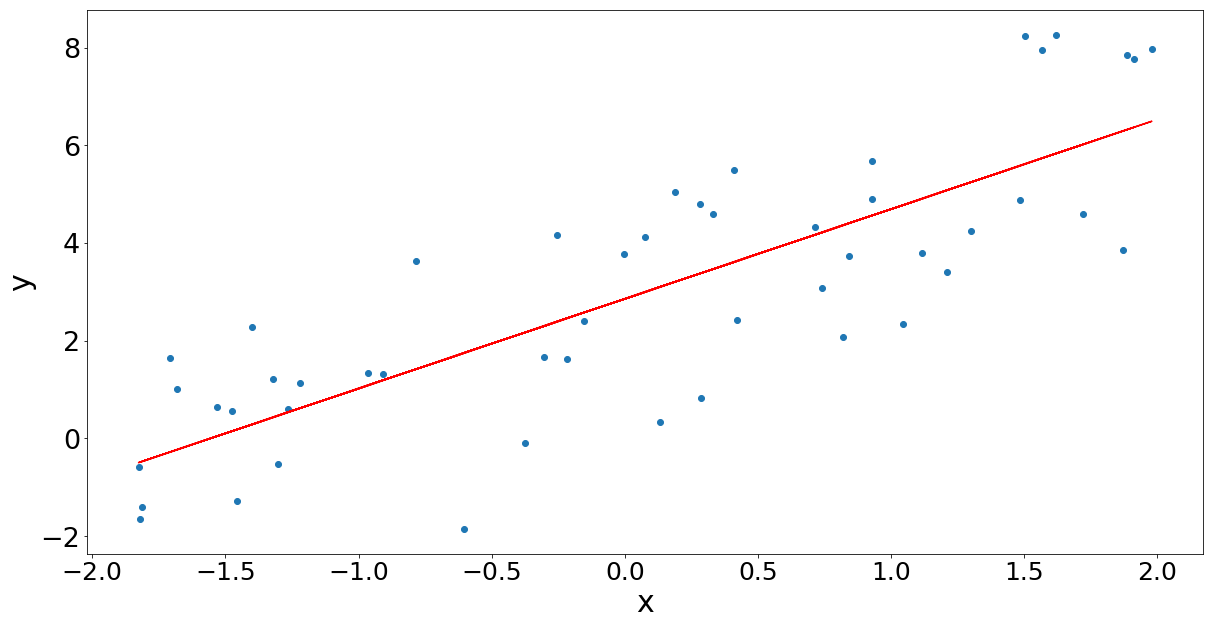

In [176]:
#question 5c) i)
x=np.random.uniform(low=-2, high=2, size=(50,))
y=3+2*x+np.random.normal(0,2,50)

matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_ci = np.dot(inv(np.dot(matrix_x.T,matrix_x)),np.dot(matrix_x.T,y)) #This is the analytical solution of theta

y_analytical_solution=np.dot(matrix_x,theta_ci)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_analytical_solution,color='red')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

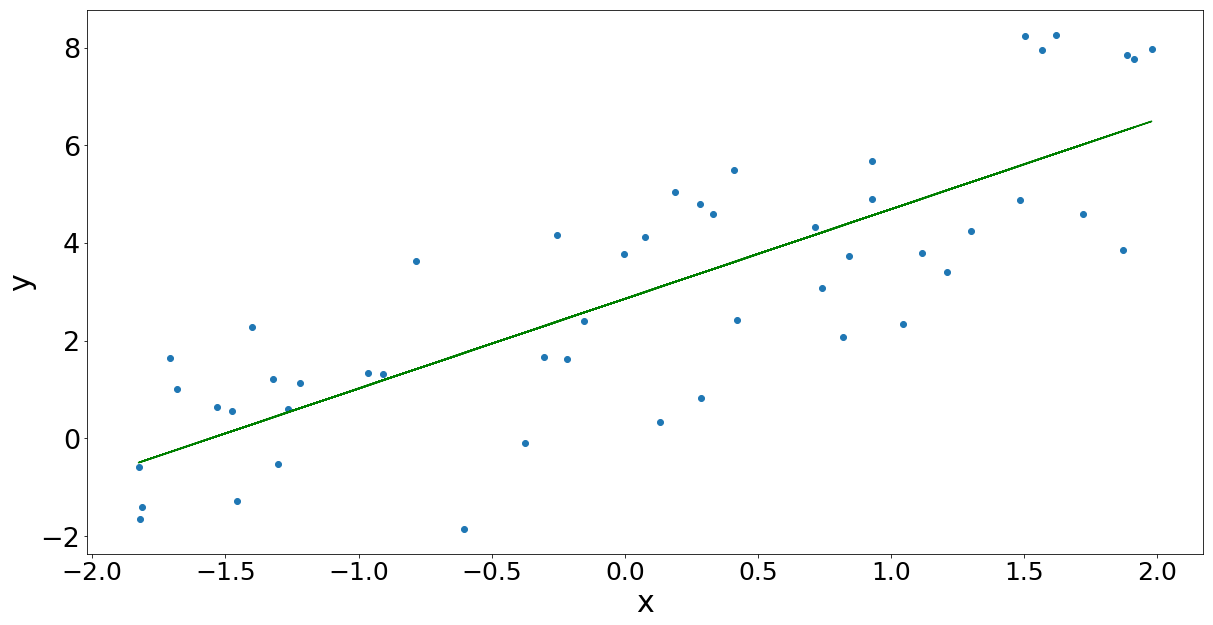

In [177]:
#question 5c) ii)
matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_i = np.random.rand(2)
all_thetas1, loss, predictions = gradient_descent(matrix_x, y, theta_i, loss_func_b)

theta_cii = all_thetas1[-1]

y_gradient_descent=np.dot(matrix_x,theta_cii)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_gradient_descent,color='green')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

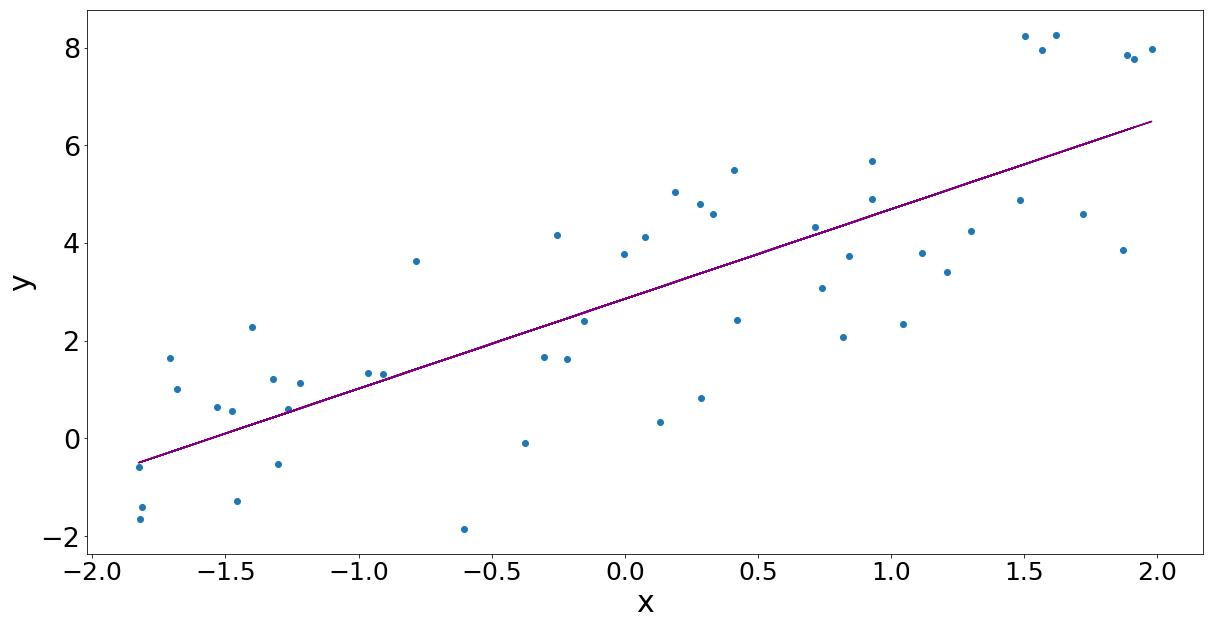

In [178]:
#question 5c) iii Huber loss case 1
matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_i = np.random.rand(2)
all_thetas2, loss, predictions = gradient_descent(matrix_x, y, theta_i, loss_func_c)

theta_ciii = all_thetas2[-1]

y_stochastic_gradient_descent=np.dot(matrix_x,theta_ciii)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_stochastic_gradient_descent,color='purple')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

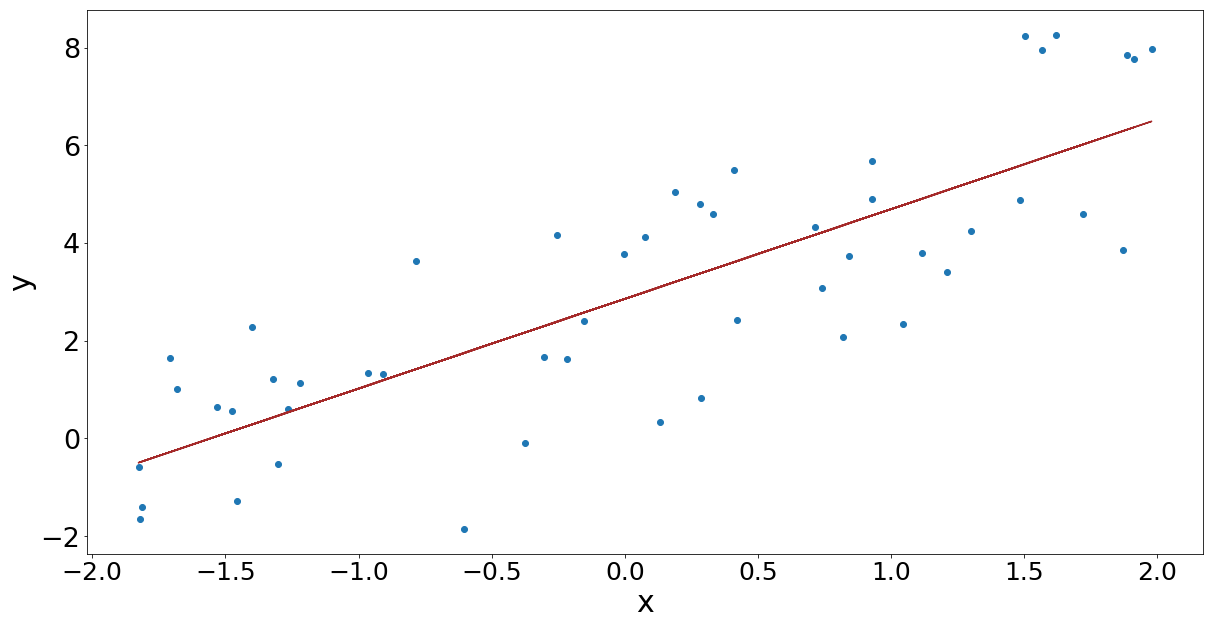

In [179]:
#question 5c) iii Huber loss case 2
matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_i = np.random.rand(2)
all_thetas2, loss, predictions = gradient_descent(matrix_x, y, theta_i, loss_func_d)

theta_ciii2 = all_thetas2[-1]

y_stochastic_gradient_descent=np.dot(matrix_x,theta_ciii2)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_stochastic_gradient_descent,color='brown')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

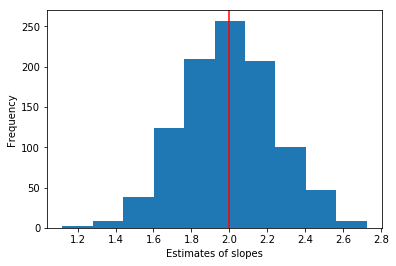

In [147]:
#question 5di) – repeating steps in part ci) 1000 times for analytical solution
theta_a = []
slopes_a = []
x = np.zeros((50,1000))
y = np.zeros((50,1000))
for d in range(1000):
    x[:,d] = np.random.uniform(low=-2, high=2, size=(50,))
    y[:,d] = 3+2*x[:,d]+np.random.normal(0,2,50)
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    theta_a.append(np.dot(inv(np.dot(matrix_x.T,matrix_x)),np.dot(matrix_x.T,y[:,d]))) #This is the analytical solution of theta
    slopes_a.append(theta_a[d-1][1])


plt.hist(slopes_a)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

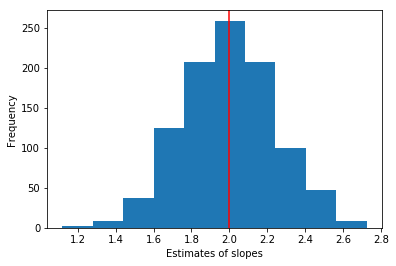

In [150]:
#question 5dii) – repeating steps in part cii) 1000 times with batch gradient descent
theta_b = []
slopes_b = []
for d in range(1000):
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    theta_i = np.random.rand(2)
    all_thetas2, loss, predictions = gradient_descent(matrix_x, y[:,d], theta_i, loss_func_b)
    theta_b.append(all_thetas2[-1])
    slopes_b.append(theta_b[d-1][1])

plt.hist(slopes_b)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

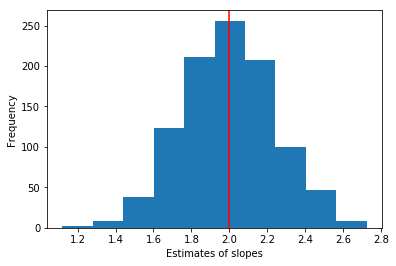

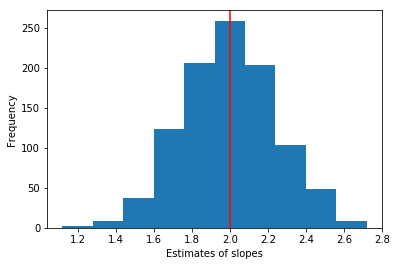

In [151]:
#question 5diii) – repeating steps in part ciii) 1000 times with batch gradient descent
theta_c1 = []
slopes_c1 = []
for d in range(1000):
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    all_thetas2, loss, predictions = gradient_descent(matrix_x, y[:,d], theta_i, loss_func_c)
    theta_c1.append(all_thetas2[-1])
    slopes_c1.append(theta_c1[d-1][1])

plt.hist(slopes_c1)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

theta_c2 = []
slopes_c2 = []
for d in range(1000):
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    all_thetas2, loss, predictions = gradient_descent(matrix_x, y[:,d], theta_i, loss_func_d)
    theta_c2.append(all_thetas2[-1])
    slopes_c2.append(theta_c2[d-1][1])

plt.hist(slopes_c2)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

The choice of the loss function in this case does not have a substantial effect on the estimates of the slope parameter.

In [153]:
#question 5e)
x=np.random.uniform(low=-2, high=2, size=(50,))
y=3+2*x+np.random.normal(0,2,50)

mask = np.random.rand(50)
for i in range(len(y[mask > .9])):
    if np.random.rand(1) > 0.5:
        y[mask > 0.9][i] = y[mask > 0.9][i]*2
    else:
        y[mask > 0.9][i] = y[mask > 0.9][i]/2


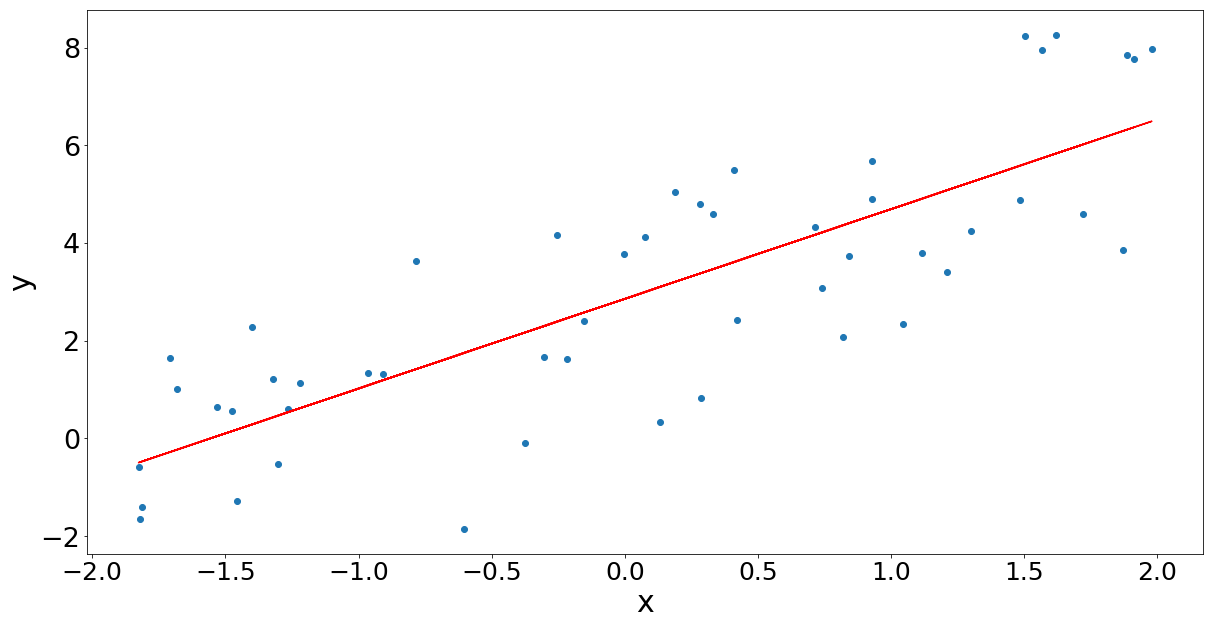

In [181]:
#5e) i) squared loss with analytical solution
matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_ei = np.dot(inv(np.dot(matrix_x.T,matrix_x)),np.dot(matrix_x.T,y)) #This is the analytical solution of theta

y_analytical_solution=np.dot(matrix_x,theta_ei)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_analytical_solution,color='red')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

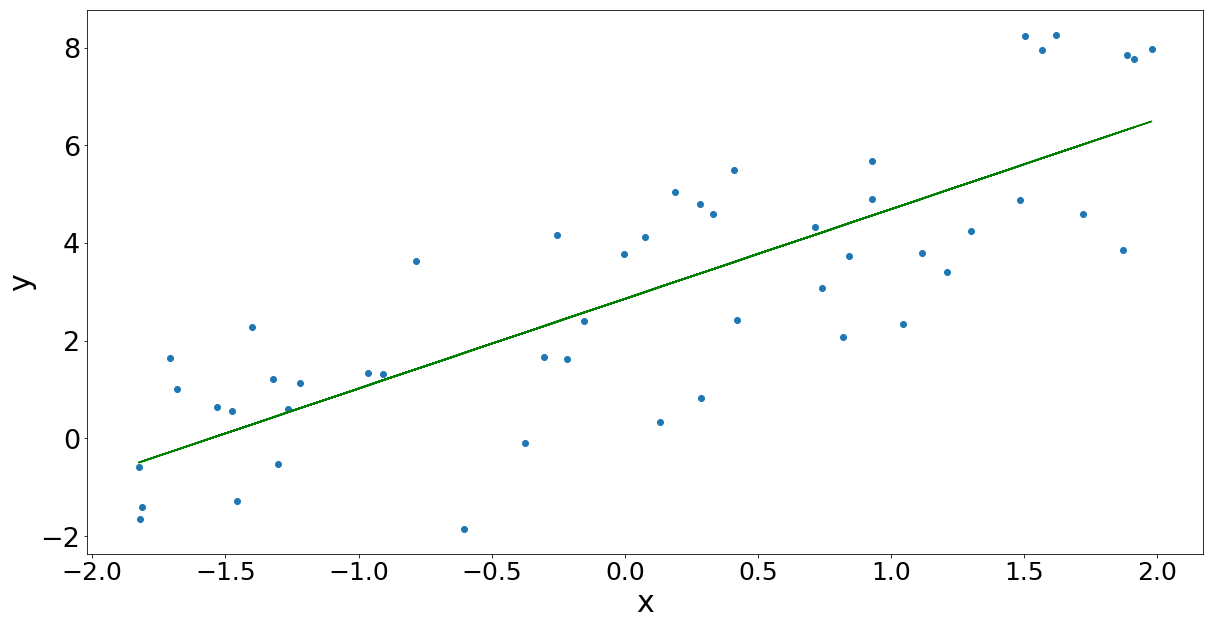

In [182]:
#5e) ii) mean absolute error with batch gradient descent
matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_i = np.random.rand(2)
all_thetas1, loss, predictions = gradient_descent(matrix_x, y, theta_i, loss_func_b)

theta_eii = all_thetas1[-1]

y_gradient_descent=np.dot(matrix_x,theta_eii)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_gradient_descent,color='green')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

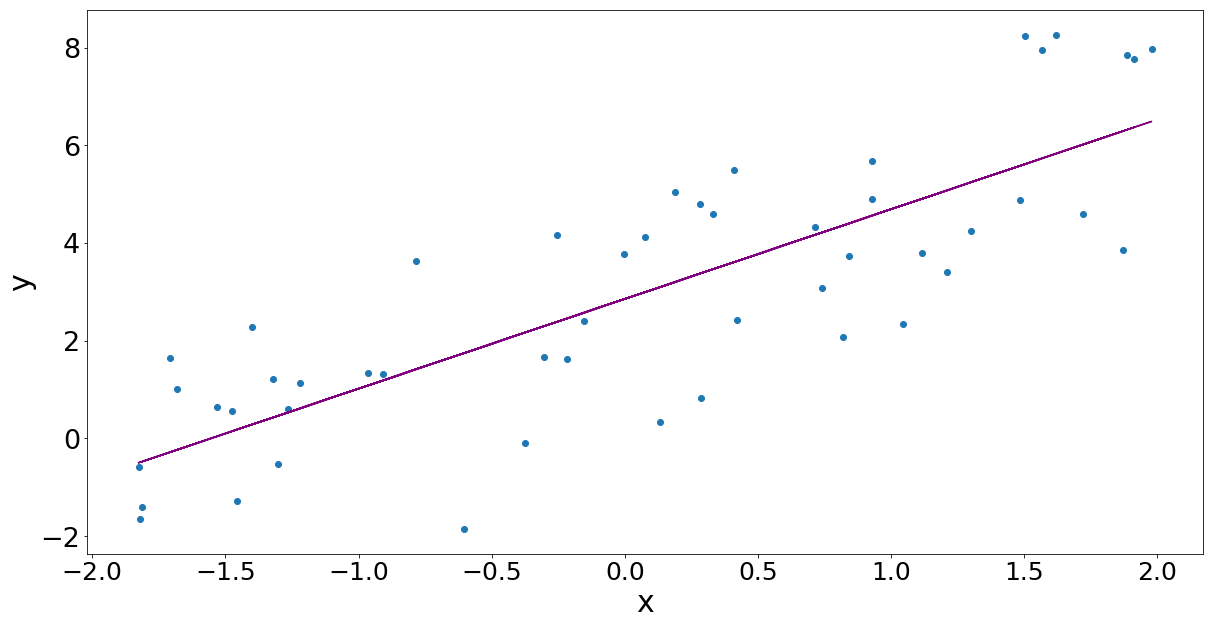

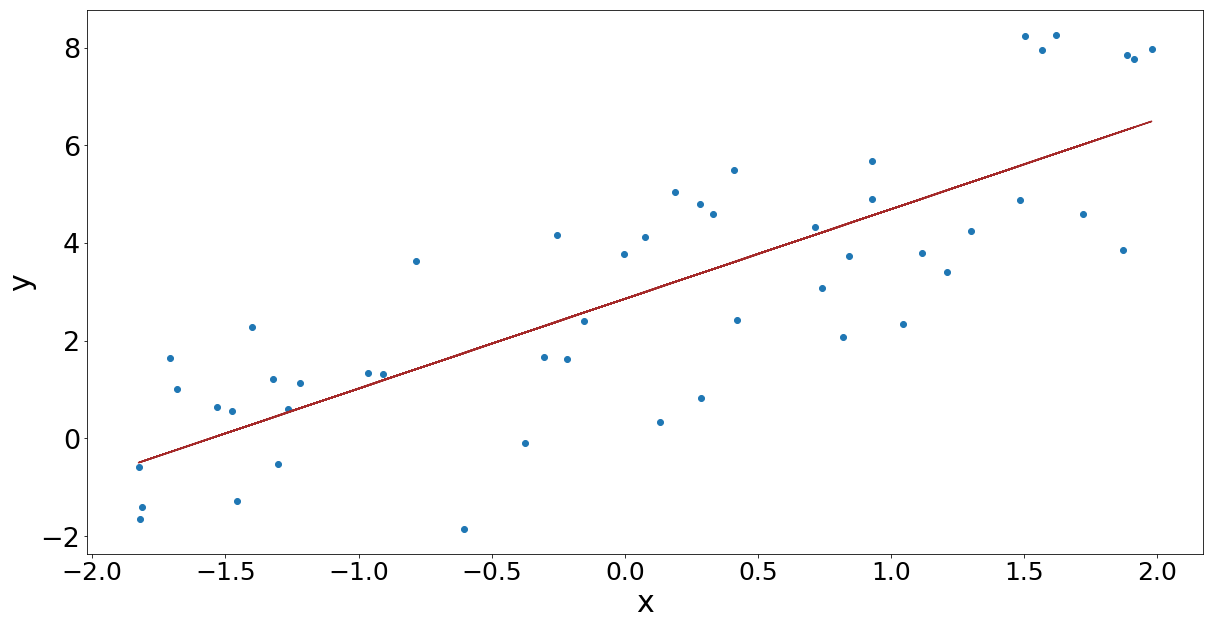

In [183]:
#5e) Huber loss with batch gradient descent
matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_i = np.random.rand(2)
all_thetas2, loss, predictions = gradient_descent(matrix_x, y, theta_i, loss_func_c)

theta_eiii = all_thetas2[-1]

y_stochastic_gradient_descent=np.dot(matrix_x,theta_eiii)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_stochastic_gradient_descent,color='purple')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

matrix_x = np.c_[np.ones(x.shape[0]), x]
theta_i = np.random.rand(2)
all_thetas2, loss, predictions = gradient_descent(matrix_x, y, theta_i, loss_func_d)

theta_eiii2 = all_thetas2[-1]

y_stochastic_gradient_descent=np.dot(matrix_x,theta_eiii2)

fig=plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,y_stochastic_gradient_descent,color='brown')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

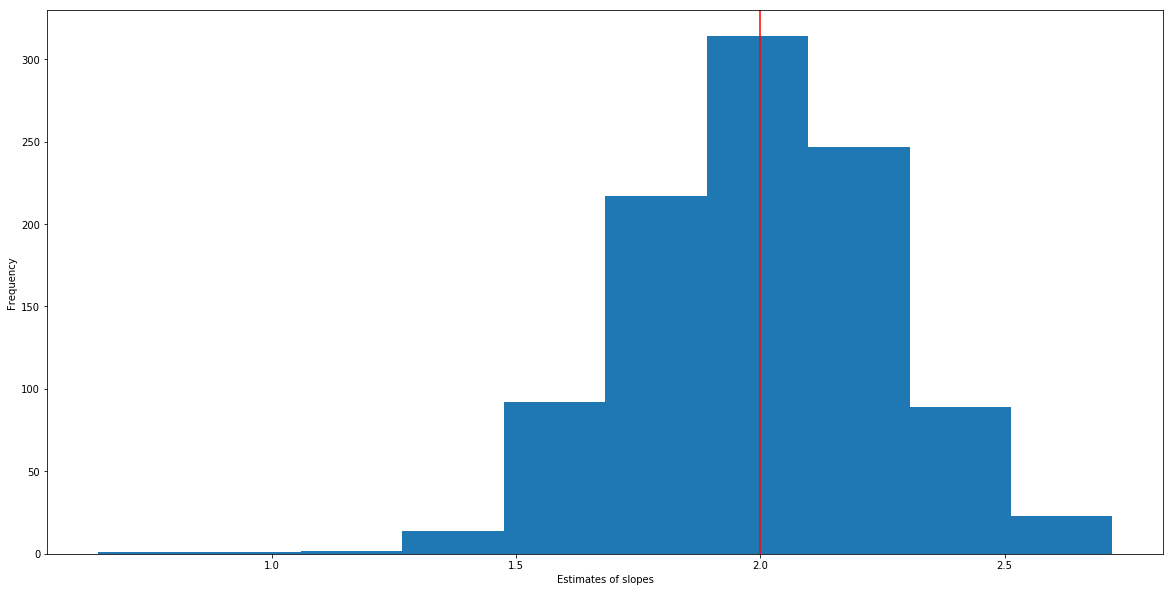

In [191]:
#5f) i) repeat e) 1000 times for squared loss with analytical solution
theta_a = []
slopes_a = []
x = np.zeros((50,1000))
y = np.zeros((50,1000))
for d in range(1000):
    x[:,d] = np.random.uniform(low=-2, high=2, size=(50,))
    y[:,d] = 3+2*x[:,d]+np.random.normal(0,2,50)
    mask = np.random.rand(50)
    for i in range(len(y[mask > .9])):
        if np.random.rand(1) > 0.5:
            y[mask > 0.9][i] = y[mask > 0.9][i]*2
        else:
            y[mask > 0.9][i] = y[mask > 0.9][i]/2
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    theta_a.append(np.dot(inv(np.dot(matrix_x.T,matrix_x)),np.dot(matrix_x.T,y[:,d]))) #This is the analytical solution of theta
    slopes_a.append(theta_a[d-1][1])

fig=plt.figure(figsize=(20,10))
plt.hist(slopes_a)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

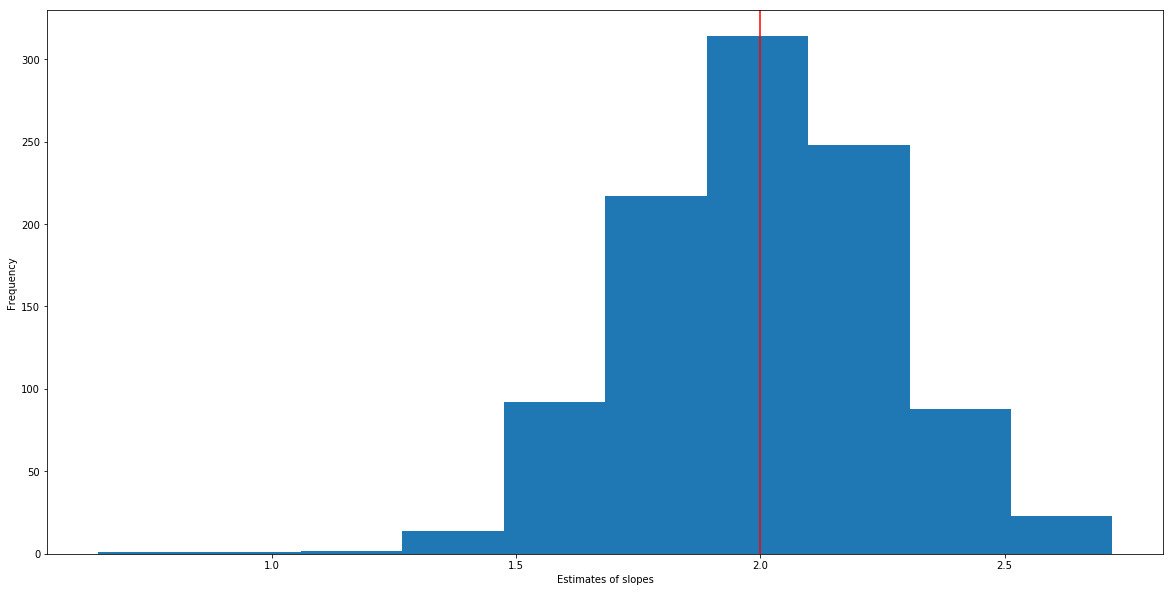

In [192]:
#5f) ii) repeat e 1000 times for mean absolute error with batch gradient descent
theta_b = []
slopes_b = []
for d in range(1000):
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    theta_i = np.random.rand(2)
    all_thetas2, loss, predictions = gradient_descent(matrix_x, y[:,d], theta_i, loss_func_b)
    theta_b.append(all_thetas2[-1])
    slopes_b.append(theta_b[d-1][1])

fig=plt.figure(figsize=(20,10))
plt.hist(slopes_b)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

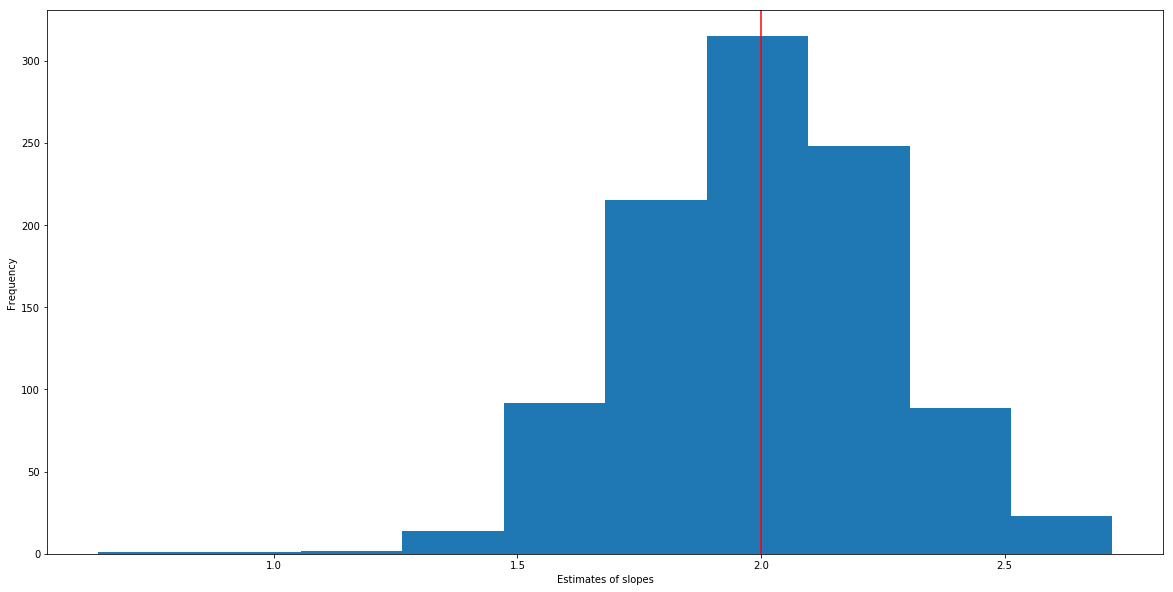

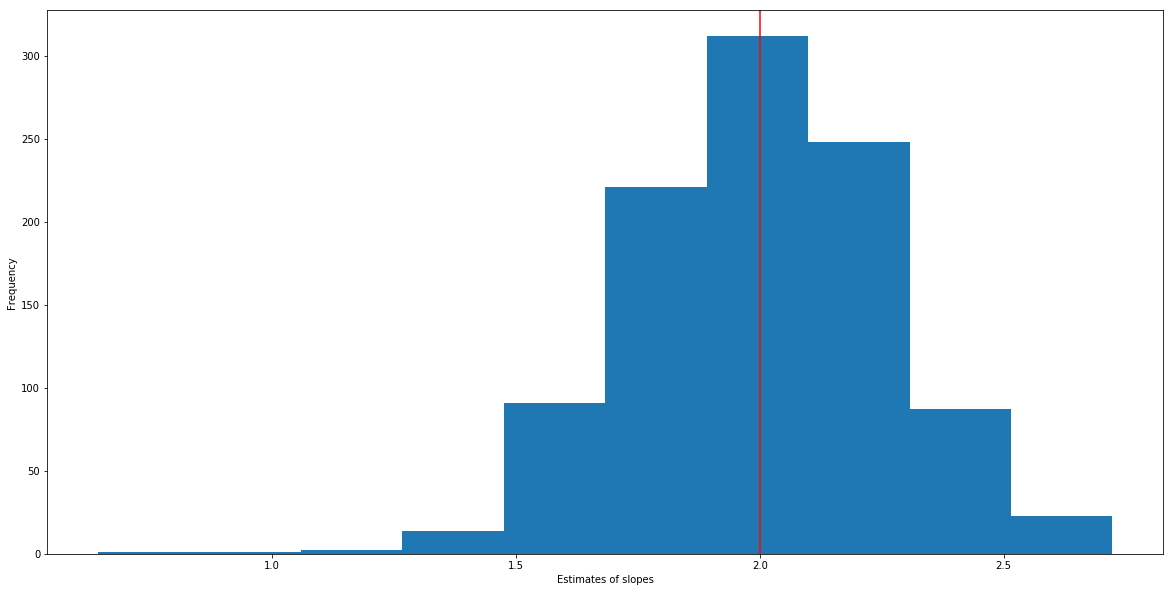

In [193]:
#question 5fiii) – repeating steps in part e 1000 times for Huber loss with batch gradient descent
theta_c1 = []
slopes_c1 = []
for d in range(1000):
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    all_thetas2, loss, predictions = gradient_descent(matrix_x, y[:,d], theta_i, loss_func_c)
    theta_c1.append(all_thetas2[-1])
    slopes_c1.append(theta_c1[d-1][1])

fig=plt.figure(figsize=(20,10))
plt.hist(slopes_c1)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

theta_c2 = []
slopes_c2 = []
for d in range(1000):
    matrix_x = np.c_[np.ones(x[:,d].shape[0]), x[:,d]]
    all_thetas2, loss, predictions = gradient_descent(matrix_x, y[:,d], theta_i, loss_func_d)
    theta_c2.append(all_thetas2[-1])
    slopes_c2.append(theta_c2[d-1][1])

fig=plt.figure(figsize=(20,10))
plt.hist(slopes_c2)
plt.xlabel('Estimates of slopes')
plt.ylabel('Frequency')
plt.axvline(x=2.0, color='red')
plt.show()

The choice of the loss function in this case does not have a substantial effect on the estimates of the slope parameter.